## Generating spectrograms

In [1]:
import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [ ]:
create_pngs_from_wavs('Sounds/cardinalis', 'Spectrograms/cardinalis')

In [ ]:
create_pngs_from_wavs('Sounds/melodia', 'Spectrograms/melodia')

In [ ]:
create_pngs_from_wavs('Sounds/migratorius', 'Spectrograms/migratorius')

In [ ]:
create_pngs_from_wavs('Sounds/polyglottos', 'Spectrograms/polyglottos')

In [ ]:
create_pngs_from_wavs('Sounds/bewickii', 'Spectrograms/bewickii')

In [2]:
from keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

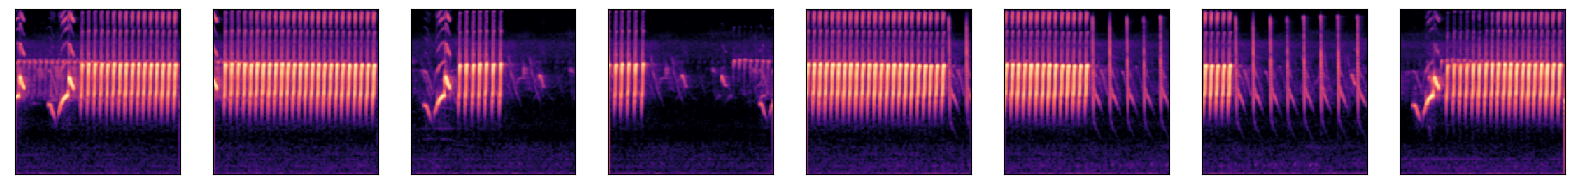

In [3]:
images, labels = load_images_from_path('Spectrograms/cardinalis', 0)
show_images(images)
    
x += images
y += labels

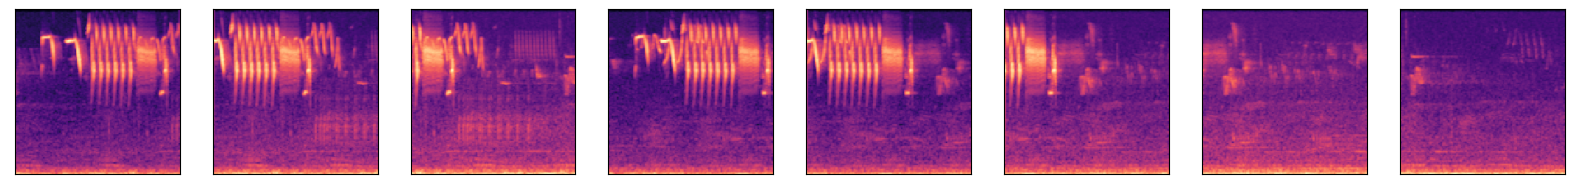

In [4]:
images, labels = load_images_from_path('Spectrograms/melodia', 1)
show_images(images)
    
x += images
y += labels

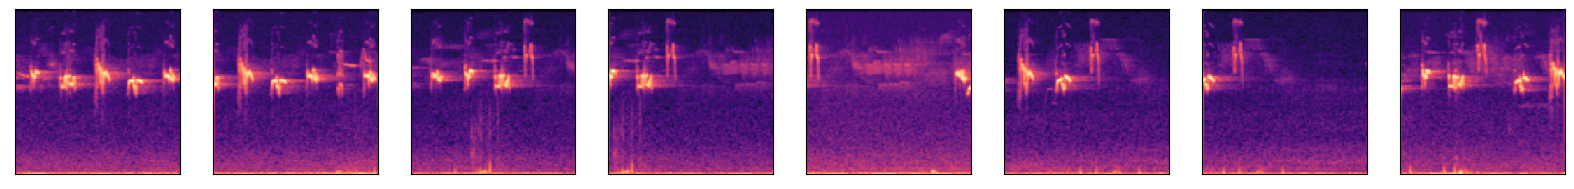

In [5]:
images, labels = load_images_from_path('Spectrograms/migratorius', 2)
show_images(images)
    
x += images
y += labels

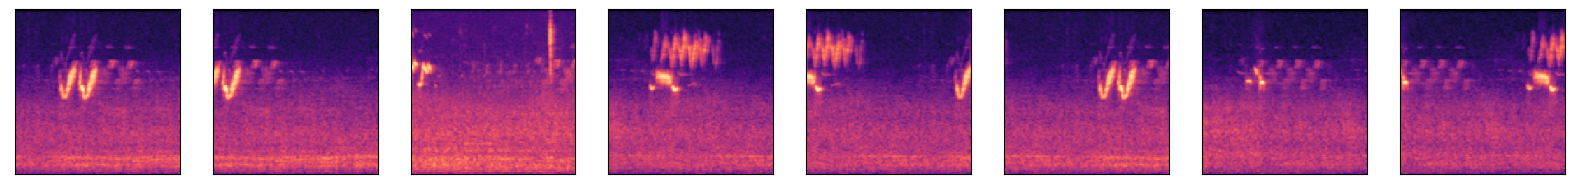

In [6]:
images, labels = load_images_from_path('Spectrograms/polyglottos', 3)
show_images(images)
    
x += images
y += labels

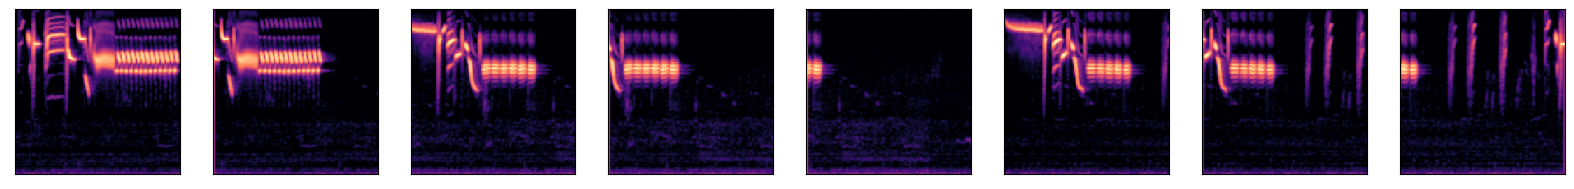

In [7]:
images, labels = load_images_from_path('Spectrograms/bewickii', 4)
show_images(images)
    
x += images
y += labels

In [8]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Training the CNN

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [10]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
434/434 [==============================] - 146s 335ms/step - loss: 0.9494 - accuracy: 0.5940 - val_loss: 0.6247 - val_accuracy: 0.7585
Epoch 2/10
434/434 [==============================] - 147s 338ms/step - loss: 0.5640 - accuracy: 0.7946 - val_loss: 0.5199 - val_accuracy: 0.8055
Epoch 3/10
434/434 [==============================] - 147s 338ms/step - loss: 0.4132 - accuracy: 0.8589 - val_loss: 0.5232 - val_accuracy: 0.8083
Epoch 4/10
434/434 [==============================] - 147s 338ms/step - loss: 0.2978 - accuracy: 0.8962 - val_loss: 0.3865 - val_accuracy: 0.8691
Epoch 5/10
434/434 [==============================] - 147s 340ms/step - loss: 0.2226 - accuracy: 0.9234 - val_loss: 0.4246 - val_accuracy: 0.8710
Epoch 6/10
434/434 [==============================] - 147s 339ms/step - loss: 0.1713 - accuracy: 0.9398 - val_loss: 0.5572 - val_accuracy: 0.8535
Epoch 7/10
434/434 [==============================] - 147s 338ms/step - loss: 0.1289 - accuracy: 0.9539 - val_loss: 0.5720 -

Plot the training and validation accuracy.

[]

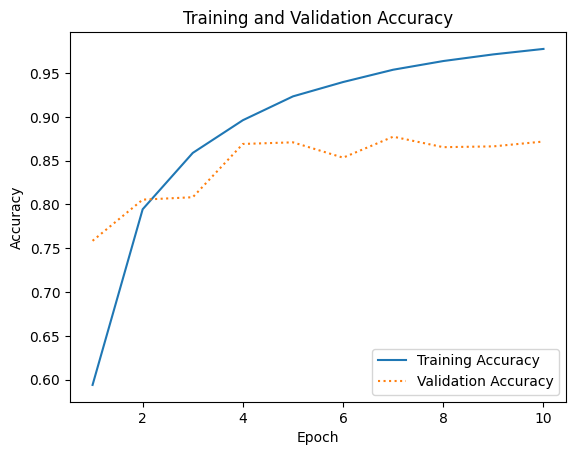

In [11]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## Transfer Learning

In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x_train_norm = preprocess_input(np.array(x_train))
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

In [14]:
model = Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
434/434 [==============================] - 69s 157ms/step - loss: 4.6569 - accuracy: 0.7113 - val_loss: 0.6066 - val_accuracy: 0.7908
Epoch 2/10
434/434 [==============================] - 68s 156ms/step - loss: 0.2529 - accuracy: 0.9078 - val_loss: 0.4307 - val_accuracy: 0.8645
Epoch 3/10
434/434 [==============================] - 68s 156ms/step - loss: 0.1067 - accuracy: 0.9592 - val_loss: 0.6362 - val_accuracy: 0.8304
Epoch 4/10
434/434 [==============================] - 69s 158ms/step - loss: 0.1116 - accuracy: 0.9594 - val_loss: 0.7411 - val_accuracy: 0.8507
Epoch 5/10
434/434 [==============================] - 68s 156ms/step - loss: 0.1644 - accuracy: 0.9502 - val_loss: 0.5627 - val_accuracy: 0.8553
Epoch 6/10
434/434 [==============================] - 68s 157ms/step - loss: 0.0974 - accuracy: 0.9691 - val_loss: 0.6469 - val_accuracy: 0.8756
Epoch 7/10
434/434 [==============================] - 69s 160ms/step - loss: 0.0942 - accuracy: 0.9689 - val_loss: 0.8658 - val_ac

Training and validation accuracy.

[]

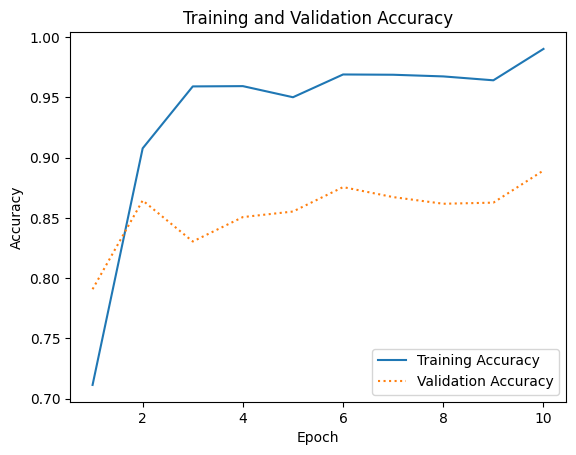

In [16]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## Confusion matrix

Text(110.44999999999997, 0.5, 'Actual label')

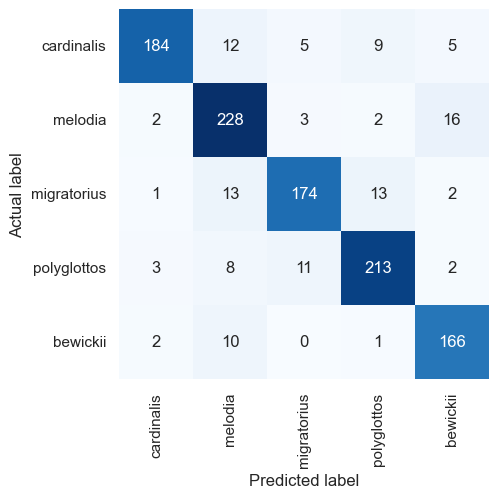

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['cardinalis', 'melodia', 'migratorius', 'polyglottos', 'bewickii']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')